In [1]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
import pickle
import matplotlib.image as mpimg
from moviepy.editor import *
from utils.utils import *

%matplotlib inline

### Load calibration coefficients

In [2]:
coeff = pickle.load( open( "camera_cal/coefficients.p", "rb" ) )
mtx = coeff['mtx']
dist = coeff['dist']

### Load video frames

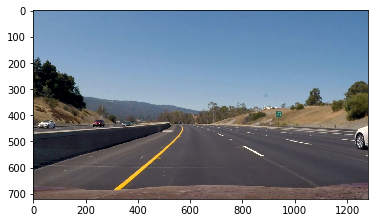

In [9]:
video_file = "test_videos/project_video.mp4"
video = VideoFileClip(video_file)

#for frame in video.iter_frames():
    #print(frame.shape)
    
time = 5
img = video.get_frame(time)

plt.imshow(img)

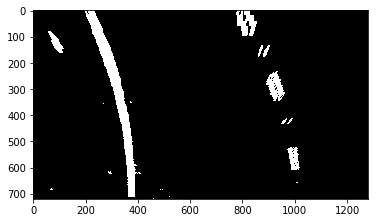

In [10]:

top_down = process_frame(img,mtx,dist)
plt.imshow(top_down, cmap='gray')

In [11]:
left_base, right_base = find_lanes_hist(top_down)
print(left_base, right_base)

364 987


In [12]:
left_fit, right_fit, left_curverad, right_curverad, out_img = get_polynomial(top_down, left_base, right_base)
print(left_fit, right_fit)
print(left_curverad, 'm', right_curverad, 'm')

[ -3.39398792e-04   4.69053596e-01   2.12572639e+02] [ -3.66450918e-04   5.70890511e-01   7.90883669e+02]
483.875836622 m 448.190986091 m


(720, 0)

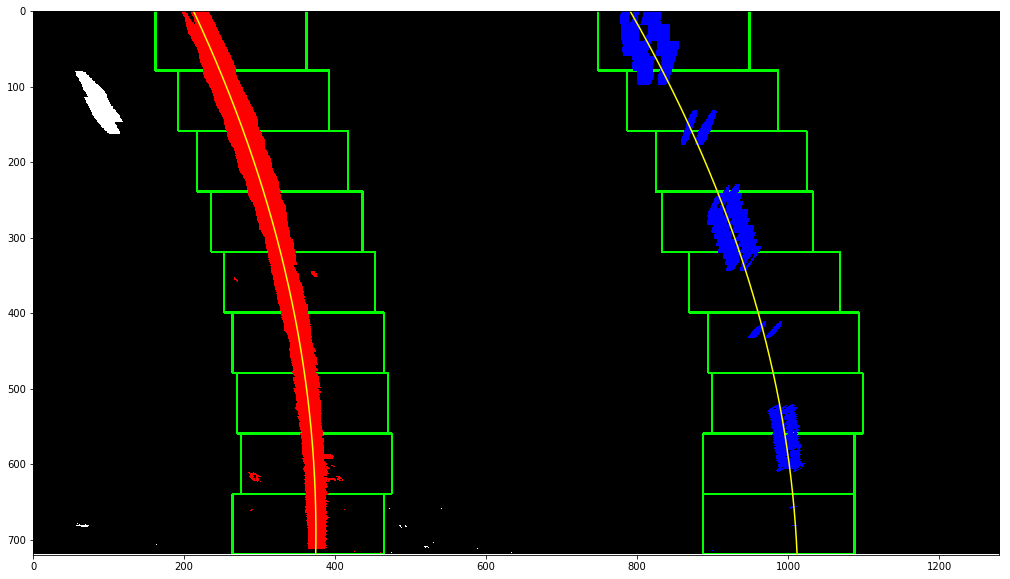

In [13]:
# Generate x and y values for plotting
ploty = np.linspace(0, top_down.shape[0]-1, top_down.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

plt.figure(figsize=(20,10))
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)


# Check horizontal distance

In [14]:
xm_per_pix = 3.7/700
a = right_fitx - left_fitx
a = a * xm_per_pix
#print(a, 'm')
print(np.mean(a), np.std(a))

#a = right_fitx[-1] - left_fitx[-1]
#print(a * xm_per_pix, 'm')

3.22564164509 0.0906793675009
